# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, Friday 12th April 2019</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

In [3]:
"""
Import packages needed for processing
"""
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time

"""
If you need add any additional packages, then add them below this line
"""
import os
import pandas as pd
from collections import OrderedDict


%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [4]:
# Declare the path to the data file
os.chdir("E:\\UNIT GUIDES DEAKIN\\SIT112\\assignment1")
DATA_FILE = "medicare-office-locations.csv"



**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [5]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['No.', 'OFFICE TYPE', 'SITE NAME', 'ADDRESS', 'SUBURB', 'STATE', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'Open', 'Close', 'Closed for lunch', 'Duration', ''])


---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['SUBURB']
    * data_dict['STATE']
    
2. Write your code to print out the number of data records. (**1 mark**)

[**Total mark: 5**]

In [6]:
# INSERT YOUR CODE HERE
'''
1. Write you code to print the type for the following variables:
    * input_file
    * data_dict
    * data_dict['SUBURB']
    * data_dict['STATE']
'''
print(type(input_file))
print(type(data_dict))
print(type(data_dict['SUBURB']))
print(type(['STATE']))

<class 'csv.DictReader'>
<class 'dict'>
<class 'numpy.ndarray'>
<class 'list'>


In [7]:
# INSERT YOUR CODE HERE
'''
2. Write your code to print out the number of data records
'''
len(list(csv.reader(open('medicare-office-locations.csv'))))

240

---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data. 

**Your task:**
1. Write your code to find and print the minimum and the maximum values in the **LATITUDE** column. (**1 mark**)
2. Write your code to find and print the minimum and maximum values of the **LONGITUDE** column. (**1 marks**)
3. Write your code to find and print the central point of all the locations. This point is a pair of the average of latitudes *(the **LATITUDE** column)* and the average of longitudes *(the **LONGITUDE** column)*. (**3 marks**)

**[Total mark: 5]**

In [8]:
# INSERT YOUR CODE HERE
"""
1. Write your code to find and print the minimum and the maximum values in the **LATITUDE** column.
"""
df = pd.read_csv("medicare-office-locations.csv")

#Finding the minimum and maximum values in the latitude column

p=df['LATITUDE'].max()
q=df['LATITUDE'].min()

print("Maximum Latitude=",p)
print("Minimum Latitude=",q)


Maximum Latitude= -12.37187
Minimum Latitude= -42.97638


In [9]:
# INSERT YOUR CODE HERE
"""
2. Write your code to find and print the minimum and maximum values of the **LONGITUDE** column.
"""
df = pd.read_csv("medicare-office-locations.csv")

#Finding the minimum and maximum values in the latitude column

a=df['LONGITUDE'].max()
b=df['LONGITUDE'].min()

print("Maximum Longitude=",a)
print("Minimum Longitude=",b)




Maximum Longitude= 153.55671
Minimum Longitude= 114.61273


In [10]:
# INSERT YOUR CODE HERE
"""
3. Write your code to find and print the central point of all the locations. 
This point is a pair of the average of latitudes *(the **LATITUDE** column)* 
    and the average of longitudes *(the **LONGITUDE** column)*
"""
df = pd.read_csv("medicare-office-locations.csv")

#Finding the central point
c=df['LATITUDE'].mean()
d=df['LONGITUDE'].mean()

print("Central Point= ",c,d)





Central Point=  -32.47650179916318 145.58025615062755


---
## **Instruction 3**
The following code segment is designed to examine data from the **STATE** column. This column provides information about the states of medical centers.


**Your tasks**:

1. Write your code to find and print out the number of **unique** states. (**3 marks**)
2. Write your code to find and print out the list of states that appears more than **ten** times in the dataset. (**3 marks**)
3. Write your code to find and print out the state with highest frequency. Both the state name and frequency need to be printed out (**3 marks**)
4. Write your code to construct a dictionary variable: ***state_popularity*** whose keys are unique states and values are the corresponding counts computed from the dataset. Print the dictionary. (**3 marks**)
5. Plot a bar chart for ***state_popularity*** sorted in descending order of values. (**3 marks**)

[**Total mark: 15**]

In [11]:
# INSERT YOUR CODE HERE 
"""
1. Write your code to find and print out the number of **unique** states.
Hint: you might want to use np.unique
"""
df = pd.read_csv("medicare-office-locations.csv")
State_column= df['STATE']

Unique_states=np.unique(State_column) 

#printing the unique states
print(Unique_states)

#printing number of unique states

print(len(Unique_states))


['ACT' 'NSW' 'NT' 'QLD' 'SA' 'TAS' 'VIC' 'WA']
8


In [12]:
# INSERT YOUR CODE HERE 
"""
2. Write your code to find and print out the list of states 
    that appears more than **ten** times in the dataset.

Hint: read the documention for function numpy.unique carefully and examine what does it return.
"""
df = pd.read_csv("medicare-office-locations.csv")
State= list(df['STATE'])

counter= Counter(State)
State_10= counter.most_common(5)

print(State_10)








[('NSW', 87), ('VIC', 54), ('QLD', 49), ('WA', 19), ('SA', 14)]


In [13]:
# INSERT YOUR CODE HERE 
"""
3. Write your code to find and print out the state with highest frequency. 
Both the state name and frequency need to be printed out
"""
df = pd.read_csv("medicare-office-locations.csv")
State= list(df['STATE'])


counter= Counter(State)
TopState= counter.most_common(1)

print(TopState)


[('NSW', 87)]


In [14]:
# INSERT YOUR CODE HERE 
"""
4. Write your code to construct a dictionary variable: ***state_popularity*** 
    whose keys are unique states and values are the corresponding counts computed from the dataset.
Print the dictionary.
"""
state_popularity = {'NSW': 87,
                    'VIC': 54,
                    'QLD': 49,
                    'WA': 19,
                    'SA': 14,
                    'TAS': 7,
                    'ACT': 5,
                    'NT': 4}

print(state_popularity)

{'NSW': 87, 'VIC': 54, 'QLD': 49, 'WA': 19, 'SA': 14, 'TAS': 7, 'ACT': 5, 'NT': 4}


NSW 87
VIC 54
QLD 49
WA 19
SA 14
TAS 7
ACT 5
NT 4


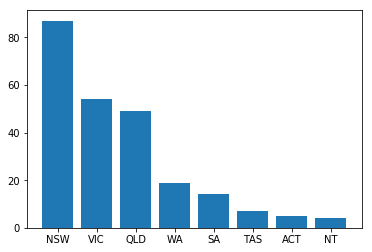

In [15]:
# INSERT YOUR CODE HERE 
'''
5. Plot a bar chart for state_popularity sorted in descending order of values.

'''
state_popularity = {'NSW': 87,
                    'VIC': 54,
                    'QLD': 49,
                    'WA': 19,
                    'SA': 14,
                    'TAS': 7,
                    'ACT': 5,
                    'NT': 4}

state_popularity_sorted_keys = sorted(state_popularity, key=state_popularity.get, reverse=True)
for r in state_popularity_sorted_keys:
    print (r, state_popularity[r])
    
    
    
    
plt.bar(range(len(state_popularity)), state_popularity.values(), align='center')
plt.xticks(range(len(state_popularity)), list(state_popularity.keys()))

plt.show()
    
    

---
## **Instruction 4**
We shall examine the opening hours of the medicare offices. The time is a string in the format: **'Hour:Minute:Second'**. If the time is not in the correct form, the opening duration of the office is **invalid**. Run the cell below:

In [16]:
# print the opening time and closing time of the first medicare office.

print(data_dict['Open'][0])
print(data_dict['Close'][0])





8:30:00
16:30:00


**Your tasks**:

1. Define a function called `compute_opening_duration` that takes two strings: the opening time and the closing time as the inputs and return the opening duration in hours. If the opening time or the closing time are not in the correct form, the function returns -1. (**7 marks**)
2. Write your code to calculate an array called **opening_duration_list** that stores the opening duration of all medicare offices. Store the array as a numpy array. Print the first 10 entries in the array. (**3 mark**)
3. Construct a new array called **valid_opening_duration_list** to store only valid opening duration entries and then print out the number of elements in the array. (**3 marks**)
4. Print the min, max, median and construct a box-plot for variable **valid_opening_duration_list**. (**5 marks**)

[**Total mark: 18**]

In [9]:
'''
1. Define a function called `compute_opening_duration` to calculate the duration of the opening time. 
The function takes two strings: the opening time and the closing time as the inputs and return the opening duration in hours.
The opening time and the closing time are in the form 'Hour:Minute:Second'.
If the opening time or the closing time are not in the correct form, the function returns -1.

Example: 
    opening time: '8:30:00', closing time: '16:00:00', return 7.5
    opening time: '9:00:00', closing time: '16:15:00', return 7.25
    opening time: '8:30:00', closing time: 'evening', return -1
    
Hint: you might want to use datetime package
'''
from datetime import datetime


FMT='%H:%M:%S'


def compute_opening_duration(opening_time, closing_time):
    '''
    Input: two string: opening_time and closing_time
    Output: the opening duration in hours
    Return -1 if any time is in incorrect form.
    '''
    
    opening_time=input('')
    closing_time=input('')
      
    
        if type(opening_time) != type(closing_time):
            print(-1)            
    tdelta=(datetime.strptime(closing_time,FMT))-(datetime.strptime(opening_time,FMT))
    timeInterval = str(tdelta)
    list = timeInterval.split(':')
    hours = list[0]
    minutes = list[1]
    seconds = list[2]
    total = (int(hours) + int(minutes) * 1/60 + int(seconds)*1/3600)
    print("total = ", total)
    
    

In [17]:
# INSERT YOUR CODE HERE
"""
2. Write your code to calculate an array called **opening_duration_list** 
    that stores the opening duration of all medicare offices.
Store the array as a numpy array.
Print the first 10 entries in the array. 
"""
opening_list= ['08:00:00','08:30:00','06:30:00','07:30:00','06:30:00','06:30:00','08:30:00','06:30:00','07:30:00','06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'-1',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'07:45:00',
'08:30:00',
'07:30:00',
'06:30:00',
'-1',
'08:00:00',
'08:45:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'09:00:00',
'08:30:00',
'07:45:00',
'07:30:00',
'08:45:00',
'08:30:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'09:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:30:00',
'07:45:00',
'08:45:00',
'08:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:30:00',
'06:30:00',
'08:45:00',
'08:00:00',
'07:30:00',
'07:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'07:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'06:45:00',
'06:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'07:45:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'07:30:00',
'08:45:00',
'08:00:00',
'-1',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:00:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:30:00',
'06:30:00',
'09:00:00',
'07:45:00',
'06:30:00',
'07:30:00',
'08:00:00',
'08:45:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:00:00',
'07:45:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'07:30:00',
'07:45:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'09:00:00',
'08:00:00',
'08:45:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'07:45:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'09:00:00',
'06:30:00',
'07:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'-1',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:30:00',
'09:00:00',
'07:30:00',
'06:30:00',
'08:00:00'
]
opening_duration_list=np.array(opening_list)
print(opening_duration_list[0:10])

['08:00:00' '08:30:00' '06:30:00' '07:30:00' '06:30:00' '06:30:00'
 '08:30:00' '06:30:00' '07:30:00' '06:30:00']


In [28]:
# INSERT YOUR CODE HERE 
"""
3. Construct a new array called **valid_opening_duration_list** to store only valid opening duration entries and 
then print out the number of elements in the array.
"""
valid_list=['08:00:00','08:30:00','06:30:00','07:30:00','06:30:00','06:30:00','08:30:00','06:30:00','07:30:00','06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'07:45:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:00:00',
'08:45:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'09:00:00',
'08:30:00',
'07:45:00',
'07:30:00',
'08:45:00',
'08:30:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'09:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:30:00',
'07:45:00',
'08:45:00',
'08:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:30:00',
'06:30:00',
'08:45:00',
'08:00:00',
'07:30:00',
'07:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'07:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'06:45:00',
'06:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'07:45:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'07:30:00',
'08:45:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:00:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:30:00',
'06:30:00',
'09:00:00',
'07:45:00',
'06:30:00',
'07:30:00',
'08:00:00',
'08:45:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:00:00',
'07:45:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'07:30:00',
'07:45:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'09:00:00',
'08:00:00',
'08:45:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'07:45:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'09:00:00',
'06:30:00',
'07:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:30:00',
'09:00:00',
'07:30:00',
'06:30:00',
'08:00:00'
]
valid_opening_duration_list=np.array(valid_list)
print(len(valid_opening_duration_list))


235


In [18]:
# INSERT YOUR CODE HERE
"""
4. Print the min, max, median and construct a box-plot for variable **valid_opening_duration_list**
"""
print(' min for variable valid_opening_duration_list is 6:30:00')
print(' max for variable valid_opening_duration_list is 9:00:00')


 min for variable valid_opening_duration_list is 6:30:00
 max for variable valid_opening_duration_list is 9:00:00


---
## **Instruction 5**
Continue from the previous steps, **your tasks are:**

1. Write your code to find and print all the invalid entry indices. An entry is invalid when its opening duration is invalid. (**5 marks**).
2. Write your code to filter out all invalid entries and store your data into a new variable **data_dict_cleaned** and print out the number of data records after being cleaned. (**5 marks**)

[**Total mark: 10**]

In [19]:
# INSERT YOUR CODE HERE
"""
1. Write your code to find and print all the invalid entry indices.
 You might want to use np.where function.
"""
invalid_indices=np.where(opening_duration_list=='-1')
print(invalid_indices)
print (opening_duration_list[invalid_indices])

(array([ 15,  35, 127, 220], dtype=int64),)
['-1' '-1' '-1' '-1']


In [20]:
# INSERT YOUR CODE HERE
"""
2. Write your code to filter out all invalid entries 
and store your data into a new variable data_dict_cleaned
and print out the number of data records after being cleaned.
"""
opening_list= ['08:00:00','08:30:00','06:30:00','07:30:00','06:30:00','06:30:00','08:30:00','06:30:00','07:30:00','06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'-1',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'07:45:00',
'08:30:00',
'07:30:00',
'06:30:00',
'-1',
'08:00:00',
'08:45:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'09:00:00',
'08:30:00',
'07:45:00',
'07:30:00',
'08:45:00',
'08:30:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'09:00:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:30:00',
'07:45:00',
'08:45:00',
'08:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:30:00',
'06:30:00',
'08:45:00',
'08:00:00',
'07:30:00',
'07:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:30:00',
'07:30:00',
'08:30:00',
'07:30:00',
'06:30:00',
'08:45:00',
'09:00:00',
'08:00:00',
'07:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:30:00',
'06:45:00',
'06:30:00',
'08:00:00',
'09:00:00',
'06:30:00',
'07:45:00',
'07:30:00',
'08:30:00',
'06:30:00',
'06:30:00',
'08:00:00',
'08:30:00',
'07:30:00',
'08:45:00',
'08:00:00',
'-1',
'08:00:00',
'06:30:00',
'06:30:00',
'08:00:00',
'06:45:00',
'08:00:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:30:00',
'06:30:00',
'09:00:00',
'07:45:00',
'06:30:00',
'07:30:00',
'08:00:00',
'08:45:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'06:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'09:00:00',
'07:30:00',
'08:00:00',
'07:45:00',
'06:30:00',
'06:30:00',
'07:30:00',
'06:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:45:00',
'08:00:00',
'06:45:00',
'08:00:00',
'09:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:30:00',
'06:30:00',
'07:30:00',
'07:30:00',
'07:45:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:30:00',
'06:30:00',
'09:00:00',
'08:00:00',
'08:45:00',
'06:30:00',
'08:00:00',
'06:30:00',
'08:00:00',
'08:30:00',
'08:00:00',
'07:45:00',
'08:00:00',
'08:00:00',
'06:45:00',
'08:00:00',
'07:45:00',
'08:00:00',
'06:30:00',
'08:00:00',
'07:30:00',
'09:00:00',
'06:30:00',
'07:30:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'-1',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'07:30:00',
'08:00:00',
'08:30:00',
'08:30:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:00:00',
'08:30:00',
'09:00:00',
'07:30:00',
'06:30:00',
'08:00:00'
]

 
def filterString(data_dict_clean):
      if '-1' not in data_dict_clean:
        return True
      else:
        return False
 


filtered_string= filter(filterString,opening_list)
 
for data_dict_clean in filtered_string:
    print(data_dict_clean)

data_dict_clean=np.array(valid_list)
print(len(valid_opening_duration_list))   

08:00:00
08:30:00
06:30:00
07:30:00
06:30:00
06:30:00
08:30:00
06:30:00
07:30:00
06:30:00
08:30:00
07:30:00
06:30:00
06:30:00
08:30:00
08:00:00
06:30:00
06:30:00
07:30:00
06:30:00
08:30:00
08:00:00
09:00:00
06:30:00
06:30:00
08:00:00
07:30:00
06:30:00
08:45:00
09:00:00
07:45:00
08:30:00
07:30:00
06:30:00
08:00:00
08:45:00
06:45:00
08:00:00
06:30:00
08:00:00
08:00:00
06:30:00
08:30:00
07:30:00
06:30:00
08:30:00
06:45:00
09:00:00
08:30:00
07:45:00
07:30:00
08:45:00
08:30:00
07:30:00
08:30:00
06:30:00
06:30:00
09:00:00
06:30:00
08:00:00
08:00:00
06:45:00
08:00:00
06:45:00
08:00:00
07:30:00
06:30:00
08:30:00
07:45:00
08:45:00
08:00:00
08:00:00
07:30:00
06:30:00
08:00:00
08:00:00
06:30:00
06:30:00
08:00:00
08:30:00
08:00:00
09:00:00
08:00:00
08:30:00
06:30:00
08:45:00
08:00:00
07:30:00
07:30:00
06:30:00
08:00:00
06:30:00
08:00:00
06:45:00
08:30:00
06:30:00
06:30:00
08:30:00
07:30:00
08:30:00
07:30:00
06:30:00
08:45:00
09:00:00
08:00:00
07:30:00
06:30:00
06:30:00
08:00:00
06:30:00
06:45:00
0

NameError: name 'valid_list' is not defined

---
## **Instruction 6**
The following code segment is designed to examine data from **ADDRESS** column.

We say that an address is **valid** if it contains the number and the name of the street, which are separated by spaces. The formats for a valid street name is **"stNumber stName"** or **"stNumber1-stNumber2 stName"**, where **stNumber**, **stNumber1** and **stNumber2** are positive numbers and **stName** is any non-empty string. For example, **20 St Kilda Road** and **100-104 Elliott Avenue** are valid addresses while **St Kilda Road** and **0 Elliott Avenue** are invalid addresses.

**Your tasks**:

1. Define a function called `valid_address` that takes a string `address` and returns `True` if `address` is valid and `False` otherwise. (**7 marks**)
2. Write your code to **further** filter out all entries with invalid addresses, and store your cleaned data into the new variable named ***data_dict_cleaned2*** and print out the number of data records after being cleaned. (**5 marks**)

**Note:** 
1. All street numbers if exist in an address are integers. There is at most a hyphen in an address to connect two street numbers.
2. In reality, an address can be "Shop 3, 10 St Kilda Road". However, for simplicity, we only consider the valid address contains street numbers and a street name.

[**Total mark: 12**]

In [34]:
# INSERT YOUR CODE HERE
'''
1. Define a function called valid_address that takes a string address and
returns True if address is valid and False otherwise.
'''
df = pd.read_csv("medicare-office-locations.csv")
original_list=list(df['ADDRESS'])

#keyword_to_be_eliminated=['Shop','Stockyard','Level','Corio','Corner','Deception','Ground','Gungahlin','Woodgrove','Lot','Shops','Units','Building','Westfield','Service','Belmont','Cnr']


def FilterString(valid_address):
    if 'Shop' in valid_address:
        return False
    elif 'Stockyard' in valid_address:
        return False
    elif 'Level' in valid_address:
        return False
    elif 'Corio' in valid_address:
        return False
    elif 'Corner' in valid_address:
        return False
    elif 'Deception' in valid_address:
        return False
    elif 'Ground' in valid_address:
        return False
    elif 'Gungahlin' in valid_address:
        return False
    elif 'Woodgrove' in valid_address:
        return False
    elif 'Lot' in valid_address:
        return False
    elif 'Shops' in valid_address:
        return False
    elif 'Units' in valid_address:
        return False
    elif 'Building' in valid_address:
        return False
    elif 'Westfield' in valid_address:
        return False
    elif 'Service' in valid_address:
        return False
    elif 'Belmont' in valid_address:
        return False
    elif 'Cnr' in valid_address:
        return False
    else:
        return True
    



In [37]:
# INSERT YOUR CODE HERE
"""
2. Write your code to further filter out all entries with invalid addresses, and store your cleaned data 
    into the new variable named data_dict_cleaned2 and print out the number of data records 
    after being cleaned.
"""
filtered= filter(FilterString,original_list)  
data_dict_cleaned2=valid_address   
  
for data_dict_cleaned2 in filtered:
    print(data_dict_cleaned2)

    
   
print('the number of data records after being cleaned is 201')

40-42 William Street
246-248 Beardy Street
433-439 Melbourne Road
307 Ross River Road
15 Peels Place
3 Cook Street
5 Railway Terrace
100 MacMillan Street
45-47 King Street
430 Wilson Street
117-121 Tamar Street
88 Atherton Road
23 Marine Terrace
38 Wingecarribee Street
14 Napier Terrace
49-61 Church Street
3 Flora Crescent
56 Railway Parade
60-62 MacLeod Street
26 Woongarra Street
5 Riverview Drive
19-23 Hollywood Avenue
180 Beryl Street
8 First Avenue (ground floor)
16-22 Pearcedale Parade
231-245 Lyttleton Terrace
53 George Street
4-12 Albert Street
166-168 Russell Street
54-56 Wittenoom Street
55 Osborne Road
2-14 Meredith Street
3-13 Harrow Street
21-25 Duke Street
46 Hickey Street
93-95 Brisbane Street
132-136 Henley Beach Road
16-22 Murray Street
8-10 Browne Street
13 Lonsdale Street
54 Canberra Terrace
7-9 Codrington Street
172-186 Moreland Road (ground floor)
186-194 Vincent Street
9 Alexander Kelly Drive
65 Massie Street
1290-1298 Albany Highway
108 Bromfield Street
42 Redland